In [146]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np

In [2]:
# This script takes two files as input and generates three images. 
# The filenames in the input commands and the name of the resource need to be configured. 

In [176]:
# Insert the file name for the file of documents that reference the resource by name or other means
# An example would be NCL-Name-Refs.csv
df_name = pd.read_csv('')

In [177]:
# Insert the file name for the file of documents that reference the resource by its persistent identifier
# An example would be NCL-DOI-Refs.csv
df_ID = pd.read_csv('')

In [178]:
#This resource name will be used down below to generate the chart labels
# Example - "NCL-Software"
Resource = ""

In [179]:
# The four data series of interest are pulled out separately
# Primary literature vs grey literature and references to the resource by name vs by the resources ID 
Primary_name = df_name[df_name['Paper-Type']=="P"]
Grey_name = df_name[df_name['Paper-Type']=="G"]

Primary_ID = df_ID[df_ID['Paper-Type']=="P"]
Grey_ID = df_ID[df_ID['Paper-Type']=="G"]
Primary_name.head(5)


,﻿Doc-IDs,Reference-Code,Paper-Type,Pub-Date
0,10.1002/2013JD021172,T,P,2014-03-27
1,10.1002/2013PA002535,T,P,2014-05
2,10.1002/2014GB005021,T,P,2015-06
3,10.1002/2015JD023266,T,P,2015-10-05
4,10.1002/2015JD023337,T,P,2015-10-23


In [180]:
# Compile the counts for each reference type: Citation, Acknowledgement, and In-text reference
Primary_name_ref_count = pd.value_counts(Primary_name['Reference-Code'])
Grey_name_ref_count = pd.value_counts(Grey_name['Reference-Code'])

Primary_ID_ref_count = pd.value_counts(Primary_ID['Reference-Code'])
Grey_ID_ref_count = pd.value_counts(Grey_ID['Reference-Code'])
Grey_ID_ref_count

C    17
A     6
T     4
Name: Reference-Code, dtype: int64

In [181]:
# Define a function that can check to see if any of the reference types are not present, e.g.  no in-text references were found for a particular resource
def f(a,b):
    if len(b) == 2:
        for j in "A","C","T":
            if len(pd.value_counts(a['Reference-Code']==j)) == 1:
                b[j]=0


In [182]:
# Apply the function to each data series to standardize the data structure
f(Grey_ID,Grey_ID_ref_count)
f(Grey_name,Grey_name_ref_count)
f(Primary_ID,Primary_ID_ref_count)
f(Primary_name,Primary_name_ref_count)
Grey_ID_ref_count

C    17
A     6
T     4
Name: Reference-Code, dtype: int64

In [183]:
# Reindex each series to ensure that they are all in the same order
Grey_ID_ref_count = Grey_ID_ref_count.reindex(index = ["C","A","T"])
Primary_ID_ref_count = Primary_ID_ref_count.reindex(index = ["C","A","T"])
Grey_name_ref_count = Grey_name_ref_count.reindex(index = ["C","A","T"])
Primary_name_ref_count = Primary_name_ref_count.reindex(index = ["C","A","T"])
Grey_ID_ref_count

C    17
A     6
T     4
Name: Reference-Code, dtype: int64

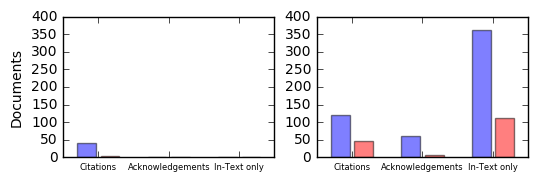

In [44]:
# Generate a bar chart for the documents that reference the resource by ID
plt.figure(1)
Bars = plt.subplot(221)
P_I = plt.bar([1,4,7], Primary_ID_ref_count, align='center', alpha=0.5, color='b')
G_I = plt.bar([2,5,8], Grey_ID_ref_count, align='center', alpha=0.5, color='r')
plt.xticks([1.5,4.5,7.5], ['Citations','Acknowledgements','In-Text only'], fontsize=6)
plt.ylabel('Documents')
#If you wanted to add legends or title, use the following two commands
#plt.legend([P_I,G_I],["Primary Lit.","Grey Lit."])
#plt.title('Documents that reference ' + Resource + " by its ID")

# Generate a bar chart for the documents that reference the resource by name
plt.subplot(222, sharey=Bars)
P_N = plt.bar([1,4,7], Primary_name_ref_count, align='center', alpha=0.5, color='b')
G_N = plt.bar([2,5,8], Grey_name_ref_count, align='center', alpha=0.5, color='r')
plt.xticks([1.5,4.5,7.5], ['Citations','Acknowledgements','In-Text only'], fontsize=6)
#If you wanted to add legends or title, use the following two commands
#plt.legend([P_N,G_N],["Primary Lit.","Grey Lit."], loc=2)
#plt.title('Documents that reference ' + Resource + " by other means")
plt.subplots_adjust(wspace = .2)

plt.savefig(Resource + '-bar-combined', dpi=300)

In [212]:
# The next analysis starts here - Generating a timeseries plot of the Primary references over time
# This line simply shows the structure of the "Pub-Date" column
Primary_name['Pub-Date'].head(5)

0    2014-03-27
1       2014-05
2       2015-06
3    2015-10-05
4    2015-10-23
Name: Pub-Date, dtype: object

In [243]:
# Create an dictionary and compile the counts of publications in each year for the two categories of primary literature references
# In the dictionary, the publications that reference the resource by Name come first, then the publications that reference the resource by its ID
Pub_Years = {}

# Compile the data
for d in Primary_name['Pub-Date']:
    date_info = re.split('-',d)
    year = date_info[0]
    if (year in Pub_Years) == False:
        Pub_Years[year] = [1,0]
    else:    
        Pub_Years[year][0] += 1

for d in Primary_ID['Pub-Date']:
    date_info = re.split('-',d)
    year = date_info[0]
    if (year in Pub_Years) == False:
        Pub_Years[year] = [0,1]
    else:    
        Pub_Years[year][1] += 1     

Pub_Years

{'2003': [1, 0],
 '2004': [1, 0],
 '2005': [1, 0],
 '2006': [5, 0],
 '2007': [4, 0],
 '2008': [11, 0],
 '2009': [12, 0],
 '2010': [14, 0],
 '2011': [18, 0],
 '2012': [27, 9],
 '2013': [37, 20],
 '2014': [41, 48],
 '2015': [39, 48],
 '2016': [18, 15]}

In [244]:
# Remove the articles from 2016 because there is not a complete year's worth of results.

if "2016" in Pub_Years:
    del Pub_Years["2016"]

Pub_Years

{'2003': [1, 0],
 '2004': [1, 0],
 '2005': [1, 0],
 '2006': [5, 0],
 '2007': [4, 0],
 '2008': [11, 0],
 '2009': [12, 0],
 '2010': [14, 0],
 '2011': [18, 0],
 '2012': [27, 9],
 '2013': [37, 20],
 '2014': [41, 48],
 '2015': [39, 48]}

In [245]:
# Generate two lists of data for plotting
Name_stack = []
ID_stack = []
for i in sorted(Pub_Years):
    Name_stack.append(Pub_Years[i][0])
    ID_stack.append(Pub_Years[i][1])

Name_stack

[1, 1, 1, 5, 4, 11, 12, 14, 18, 27, 37, 41, 39]

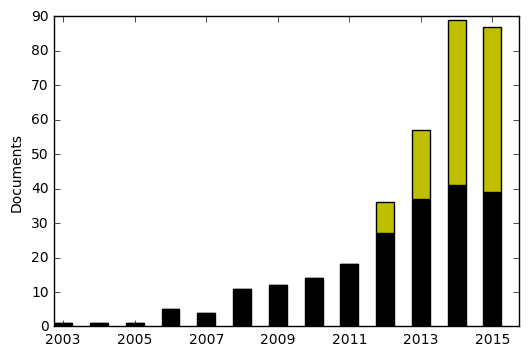

In [246]:
# Create the timeseries plot
N = len(Pub_Years) # the number of years in the plot

ind = np.arange(N) # the x locations for the groups
#ind = ind + 1
width = .5    # the width of the bars

fig, ax = plt.subplots()

p1 = plt.bar(ind, Name_stack, width, color='black')
p2 = plt.bar(ind, ID_stack, width, color='y',
             bottom=Name_stack)

plt.ylabel('Documents')
plt.xticks(ind + width/2., [i for i in sorted(Pub_Years)])
#plt.xticks(ind[0::2] + width/2., [i for i in (sorted(Pub_Years))[0::2]]) #this line was used for the NCL plot because the x labels were overlapping each other
ax.set_xlim([0, N])
#If you want a title & legend, use the following two commands
#plt.title('Primary Literature References Per Year')
#plt.legend((p1[0], p2[0]), ('References by Name', 'References by ID'), loc=2)
plt.savefig(Resource + '-timeline', dpi=300)
plt.show()
